# Algoritmo

El método de Euler se puede utilizar para solucionar ecuaciones diferenciales de la forma:

$$\frac{dy}{dx}=f(y)$$

Aunque también se puede emplear para solucionar ecuaciones de órdenes mayores haciendo uso de variables auxiliares. El metodo inicialmente parte de la aproximación del diferencial por diferencias finitas:

$$\frac{y_{i+1}-y_{i}}{dx}\approx\frac{dy}{dx}=f(y_{i})$$
$$\Rightarrow y_{i+1}=y_{i}+dxf(y_{i})$$

Donde $dx\approx h$.

El algoritmo debe seguir la forma:

1. Definir el valor inicial de $y$.
2. Definir el valor de $h$.
3. Definir el intervalo en el que se encuentra la variable independiente $x_{\textrm{min}}\leq x\leq x_{\textrm{máx}}$
4. Hacer la primera evaluación de $y_{i+1}$.

# Problema 1

Se desea resolver la ecuación diferencial:

$$\frac{dy}{dx}=\frac{1}{2}\left(1-y\right),\quad y(0)=0$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parámetros iniciales
y0=0
h=0.5

In [3]:
función=lambda y: (1-y)/2

In [4]:
x=np.arange(0,10+h,h)
y=np.zeros_like(x)
y[0]=y0
for i in range(len(y)-1):
    y[i+1]=y[i]+h*función(y[i])

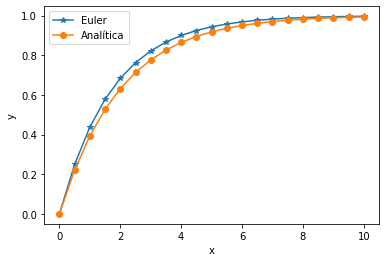

In [5]:
plt.plot(x,y,marker="*")
plt.plot(x,(1-np.exp(-x/2)),marker="o")
plt.legend(["Euler","Analítica"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Problema 2
Ahora, se desea resolver la ecuación diferencial:

$$\frac{dy}{dx}=cos(y),\quad y(0)=1$$

In [6]:
# Parámetros iniciales
y0=1
h=0.01

In [7]:
función=lambda y: np.cos(y)

In [8]:
x=np.arange(0,10+h,h)
y=np.zeros_like(x)
y[0]=y0
for i in range(len(y)-1):
    y[i+1]=y[i]+h*función(y[i])

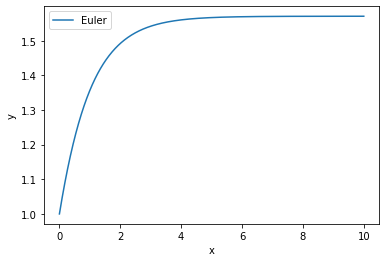

In [9]:
plt.plot(x,y)
# plt.plot(x,(1-np.exp(-x/2)),marker="o")
plt.legend(["Euler","Analítica"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
x[np.where(x==2.85)],y[np.where(x==2.85)]

(array([2.85]), array([1.53732502]))

# Problema 3

Ahora, se desea resolver un sistema de ecuaciones diferenciales:

$$\frac{dx}{dt}=\sigma(y-x)$$
$$\frac{dy}{dt}=x(\rho-z)-y$$
$$\frac{dz}{dt}=xy-\beta z$$

Donde $\sigma=10$, $\rho=28$ y $\beta=8/3$. Además $x(0)=1$, $y(0)=2$ y $z(0)=3$. Se desea integrar para $0\leq t\leq 1$.

In [11]:
h=1e-3
x0=-1
y0=2
z0=3

In [12]:
sigma=10
rho=28
beta=8/3

In [13]:
fx=lambda x,y,z: sigma*(y-x)
fy=lambda x,y,z: x*(rho-z)-y
fz=lambda x,y,z: x*y-beta*z

In [14]:
t=np.arange(0,1+h,h)
x=np.zeros_like(t)
y=np.zeros_like(t)
z=np.zeros_like(t)
x[0]=x0
y[0]=y0
z[0]=z0
for i in range(len(t)-1):
    x[i+1]=x[i]+h*fx(x[i],y[i],z[i])
    y[i+1]=y[i]+h*fy(x[i],y[i],z[i])
    z[i+1]=z[i]+h*fz(x[i],y[i],z[i])

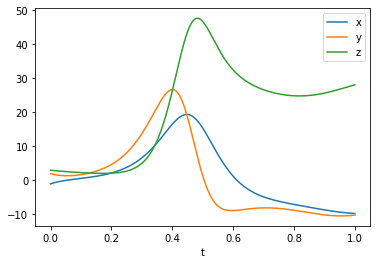

In [15]:
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,z)
plt.legend(["x","y","z"])
plt.xlabel("t")
plt.show()

In [16]:
y[np.where(t==0.5)]

array([1.33548727])

# Problema 4

Ahora, se desea resolver el sistema de ecuaciones para un reactor Batch:

$$\frac{dA}{dt}=-R_{1}$$
$$\frac{dB}{dt}=-R_{1}-R_{2}$$
$$\frac{dC}{dt}=R_{1}-R_{2}$$
$$\frac{dD}{dt}=R_{2}$$

Donde $R_{1}=k_{1}AB-k_{1}'C$, $R_{2}=k_{2}BC$. Con $k_{1}=0.01$, $k_{1}'=0.015$ y $k_{2}=0.001$

In [17]:
A0=10
B0=20
C0=0
D0=0
h=1e-3

In [18]:
k1=0.01
k11=0.015
k2=0.001

In [19]:
R1=lambda A,B,C,D: k1*A*B-k11*C
R2=lambda A,B,C,D: k2*B*C

In [20]:
t=np.arange(0,300+h,h)
A=np.zeros_like(t)
B=np.zeros_like(t)
C=np.zeros_like(t)
D=np.zeros_like(t)
A[0]=A0
B[0]=B0
C[0]=C0
D[0]=D0
for i in range(len(t)-1):
    A[i+1]=A[i]+h*(-R1(A[i],B[i],C[i],D[i]))
    B[i+1]=B[i]+h*(-R1(A[i],B[i],C[i],D[i])-R2(A[i],B[i],C[i],D[i]))
    C[i+1]=C[i]+h*(R1(A[i],B[i],C[i],D[i])-R2(A[i],B[i],C[i],D[i]))
    D[i+1]=D[i]+h*(R2(A[i],B[i],C[i],D[i]))

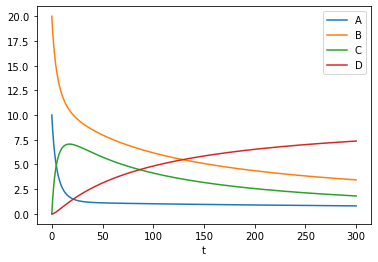

In [21]:
plt.plot(t,A)
plt.plot(t,B)
plt.plot(t,C)
plt.plot(t,D)
plt.legend(["A","B","C","D"])
plt.xlabel("t")
plt.show()

In [22]:
A[np.where(t==200)]

array([0.90326794])